In [17]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import spline
from scipy.interpolate import interp1d

In [3]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
        
    return TP, FP,TN, FN       

In [4]:
pro_x = []
pro_y = []
with open ('Data/probabilities.txt') as f:
    lines = f.readlines()
    for x in lines:
        y = x.strip().split(" ")
        pro_x.append(y[0])
        pro_y.append(y[1])
        

In [5]:
with open ('Data/DL_probabilities_x.txt','w') as f:
    f.write("\n".join(map(lambda x: x, pro_x)) + "\n")
    

In [6]:
with open ('Data/DL_probabilities_y.txt','w') as f:
    f.write("\n".join(map(lambda x: x, pro_y)) + "\n")

In [7]:
GT = pd.read_excel("Data/DL_test_set_vocab.xlsx")

In [8]:
fpr, tpr, thresholds = metrics.roc_curve(GT.actual_label.values, GT.prediction.values, pos_label=1)

In [9]:
print("FPR", fpr)
print("TPR", tpr)

('FPR', array([ 0.        ,  0.80929095,  1.        ]))
('TPR', array([ 0.        ,  0.87037037,  1.        ]))


In [10]:
metrics.auc(fpr, tpr)

0.53053970841256903

In [11]:
metrics.accuracy_score(GT.actual_label.values, GT.prediction.values)

0.26997840172786175

In [12]:
metrics.roc_auc_score(GT.actual_label.values, GT.prediction.values)

0.53053970841256903

In [13]:
TP, FP,TN, FN  = perf_measure(GT.actual_label.values, GT.prediction.values)

In [14]:
TP, FP,TN, FN

(47, 331, 78, 7)

In [19]:
pr = metrics.precision_score(GT.actual_label.values, GT.prediction.values, pos_label=1, average='binary', sample_weight=None)
recall = metrics.recall_score(GT.actual_label.values, GT.prediction.values, pos_label=1, average='binary', sample_weight=None)

In [22]:
print("precision", pr)
print("recall", recall)

('precision', 0.12433862433862433)
('recall', 0.87037037037037035)


In [23]:
loss = metrics.hamming_loss(GT.actual_label.values, GT.prediction.values)
print("loss", loss)

('loss', 0.73002159827213819)


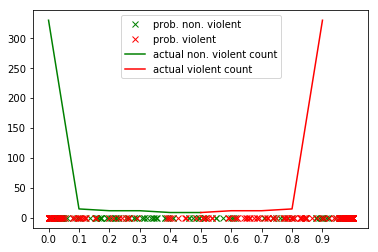

In [39]:
non_violent_count_y = np.array([non_violent_prob_count_1,non_violent_prob_count_2,non_violent_prob_count_3,non_violent_prob_count_4,\
                   non_violent_prob_count_5,non_violent_prob_count_5])

violent_count_y = np.array([violent_prob_count_6,violent_prob_count_7,violent_prob_count_8,violent_prob_count_9,\
                   violent_prob_count_10])

nv_x = np.arange(0,0.6,0.1)
v_x = np.arange(0.5,1,0.1)

non_vio_probab_x = GT.probabilities_non_violence.values
non_v_probab_y = np.zeros(463)

vio_probab_x = GT.probabilities_violence.values
v_probab_y = np.zeros(463)

plt.plot(non_vio_probab_x, non_v_probab_y, "gx",label='prob. non. violent' )
plt.plot(vio_probab_x, v_probab_y, "rx",label='prob. violent' )
plt.plot(nv_x,non_violent_count_y,'g',label='actual non. violent count')
plt.plot(v_x,violent_count_y, 'r',label='actual violent count')

plt.xticks(np.arange(0,1, 0.1))
plt.yticks(np.arange(0,350, 50))
plt.legend()
plt.savefig("Data/prob. dist.pdf")
plt.show()

In [22]:
actual_non_vio = GT[GT.actual_label==0]
actual_vio = GT[GT.actual_label==1]
print("len actual_non_vio",len(actual_non_vio))
print("len actual_vio",len(actual_vio))

('len actual_non_vio', 409)
('len actual_vio', 54)


In [23]:
prediction_non_vio = GT[GT.prediction==0]
prediction_vio = GT[GT.prediction==1]
print("len prediction_non_vio",len(prediction_non_vio))
print("len prediction_vio",len(prediction_vio))

('len prediction_non_vio', 85)
('len prediction_vio', 378)


In [24]:
actual_non_vio_prob = pd.concat([actual_non_vio.probabilities_non_violence, actual_non_vio.probabilities_violence], axis=1)

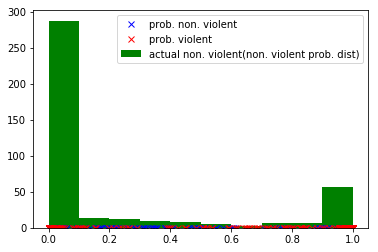

In [25]:
plt.hist(actual_non_vio.probabilities_non_violence, facecolor = 'green',label= 'actual non. violent(non. violent prob. dist)')
#plt.hist(actual_non_vio.probabilities_violence, facecolor ='red',label= 'actual non. violent(violent prob. dist)')
plt.plot(non_vio_probab_x, non_v_probab_y, "bx",label='prob. non. violent' )
plt.plot(vio_probab_x, v_probab_y, "rx",label='prob. violent' )
plt.legend()
plt.show()

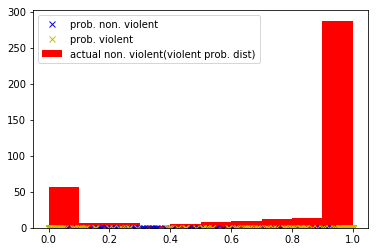

In [26]:
plt.hist(actual_non_vio.probabilities_violence, facecolor ='red',label= 'actual non. violent(violent prob. dist)')
plt.plot(non_vio_probab_x, non_v_probab_y, "bx",label='prob. non. violent' )
plt.plot(vio_probab_x, v_probab_y, "yx",label='prob. violent' )
plt.legend()
plt.show()

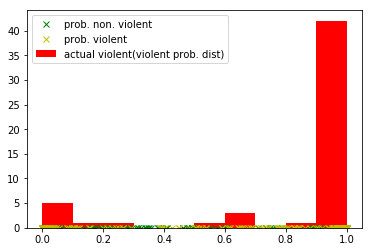

In [27]:
plt.hist(actual_vio.probabilities_violence, facecolor ='red',label= 'actual violent(violent prob. dist)')
#plt.hist(actual_vio.probabilities_non_violence, facecolor = 'green',label= 'actual violent(non. violent prob. dist)')
plt.plot(non_vio_probab_x, non_v_probab_y, "gx",label='prob. non. violent' )
plt.plot(vio_probab_x, v_probab_y, "yx",label='prob. violent' )
plt.legend()
plt.show()

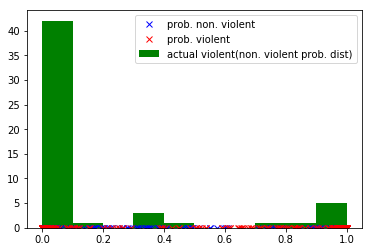

In [28]:
plt.hist(actual_vio.probabilities_non_violence, facecolor = 'green',label= 'actual violent(non. violent prob. dist)')
plt.plot(non_vio_probab_x, non_v_probab_y, "bx",label='prob. non. violent' )
plt.plot(vio_probab_x, v_probab_y, "rx",label='prob. violent' )
plt.legend()
plt.show()

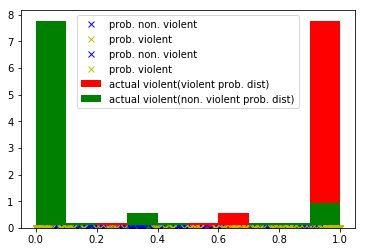

In [29]:
plt.hist(actual_vio.probabilities_violence, facecolor ='red',label= 'actual violent(violent prob. dist)',normed=1, histtype='bar', stacked=True)
plt.hist(actual_vio.probabilities_non_violence, facecolor = 'green',label= 'actual violent(non. violent prob. dist)',normed=1, histtype='bar', stacked=True)
plt.plot(non_vio_probab_x, non_v_probab_y, "bx",label='prob. non. violent' )
plt.plot(vio_probab_x, v_probab_y, "yx",label='prob. violent' )
plt.plot(non_vio_probab_x, non_v_probab_y, "bx",label='prob. non. violent' )
plt.plot(vio_probab_x, v_probab_y, "yx",label='prob. violent' )
plt.legend()
plt.show()

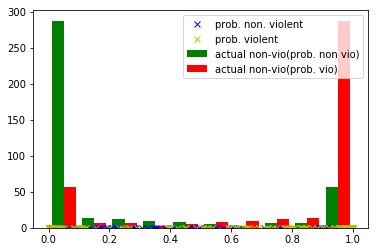

In [30]:
plt.hist(actual_non_vio_prob.values,normed=0, histtype='bar', stacked=False, color = ['green','red'], label= ["actual non-vio(prob. non vio)","actual non-vio(prob. vio)"])
plt.plot(actual_non_vio_prob.probabilities_non_violence.values, np.zeros(len(actual_non_vio_prob)), "bx",label='prob. non. violent' )
plt.plot(actual_non_vio_prob.probabilities_violence.values, np.zeros(len(actual_non_vio_prob)), "yx",label='prob. violent' )
plt.legend(loc=1)
plt.savefig("Data/actual_non_vio_prob. dist2.pdf")
plt.show()

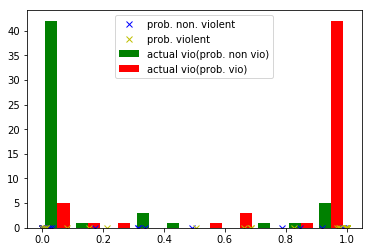

In [31]:
plt.hist([actual_vio.probabilities_non_violence,actual_vio.probabilities_violence],normed=0, histtype='bar', stacked=False, color = ['green','red'], label= ["actual vio(prob. non vio)","actual vio(prob. vio)"])
plt.plot(actual_vio.probabilities_non_violence.values, np.zeros(len(actual_vio)), "bx",label='prob. non. violent' )
plt.plot(actual_vio.probabilities_violence.values, np.zeros(len(actual_vio)), "yx",label='prob. violent' )
plt.legend()
plt.savefig("Data/actual_vio_prob. dist2.pdf")
plt.show()

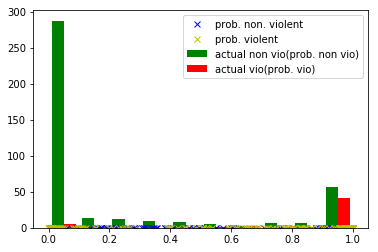

In [32]:
plt.hist([actual_non_vio.probabilities_non_violence,actual_vio.probabilities_violence],normed=0, histtype='bar', stacked=False, color = ['green','red'], label= ["actual non vio(prob. non vio)","actual vio(prob. vio)"])
plt.plot(non_vio_probab_x, non_v_probab_y, "bx",label='prob. non. violent' )
plt.plot(vio_probab_x, v_probab_y, "yx",label='prob. violent' )
plt.legend()
plt.savefig("Data/actual_vio_actual_non_prob. dist.pdf")
plt.show()

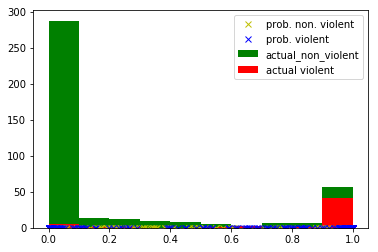

In [36]:
plt.hist(actual_non_vio.probabilities_non_violence,facecolor= 'green',label= 'actual_non_violent')
#plt.hist(actual_non_vio.probabilities_non_violence,label= 'actual non violent')
plt.hist(actual_vio.probabilities_violence, facecolor='red',label= 'actual violent')
#plt.hist(actual_vio.probabilities_non_violence,label= 'actual non violent')
plt.plot(non_vio_probab_x, non_v_probab_y, "yx",label='prob. non. violent' )
plt.plot(vio_probab_x, v_probab_y, "bx",label='prob. violent' )
plt.legend()
plt.savefig("Data/prob. dist2.pdf")
plt.show()